In [1]:
from Binaries import *

In [2]:
cnn = np.loadtxt("/cr/users/filip/MoneyPlot/data/120_TwoLayer_Downsampled_AllEnergies_5_0VEM/validation_data_no_cuts.csv")
ecnn = np.loadtxt("/cr/users/filip/MoneyPlot/data/120_eCNN_Downsampled_AllEnergies_5_0VEM/validation_data_no_cuts.csv")

In [3]:
score_cnn = cnn[:, -1] / np.log(cnn[:, 2])
score_ecnn = ecnn[:, -1] / np.log(cnn[:,2])

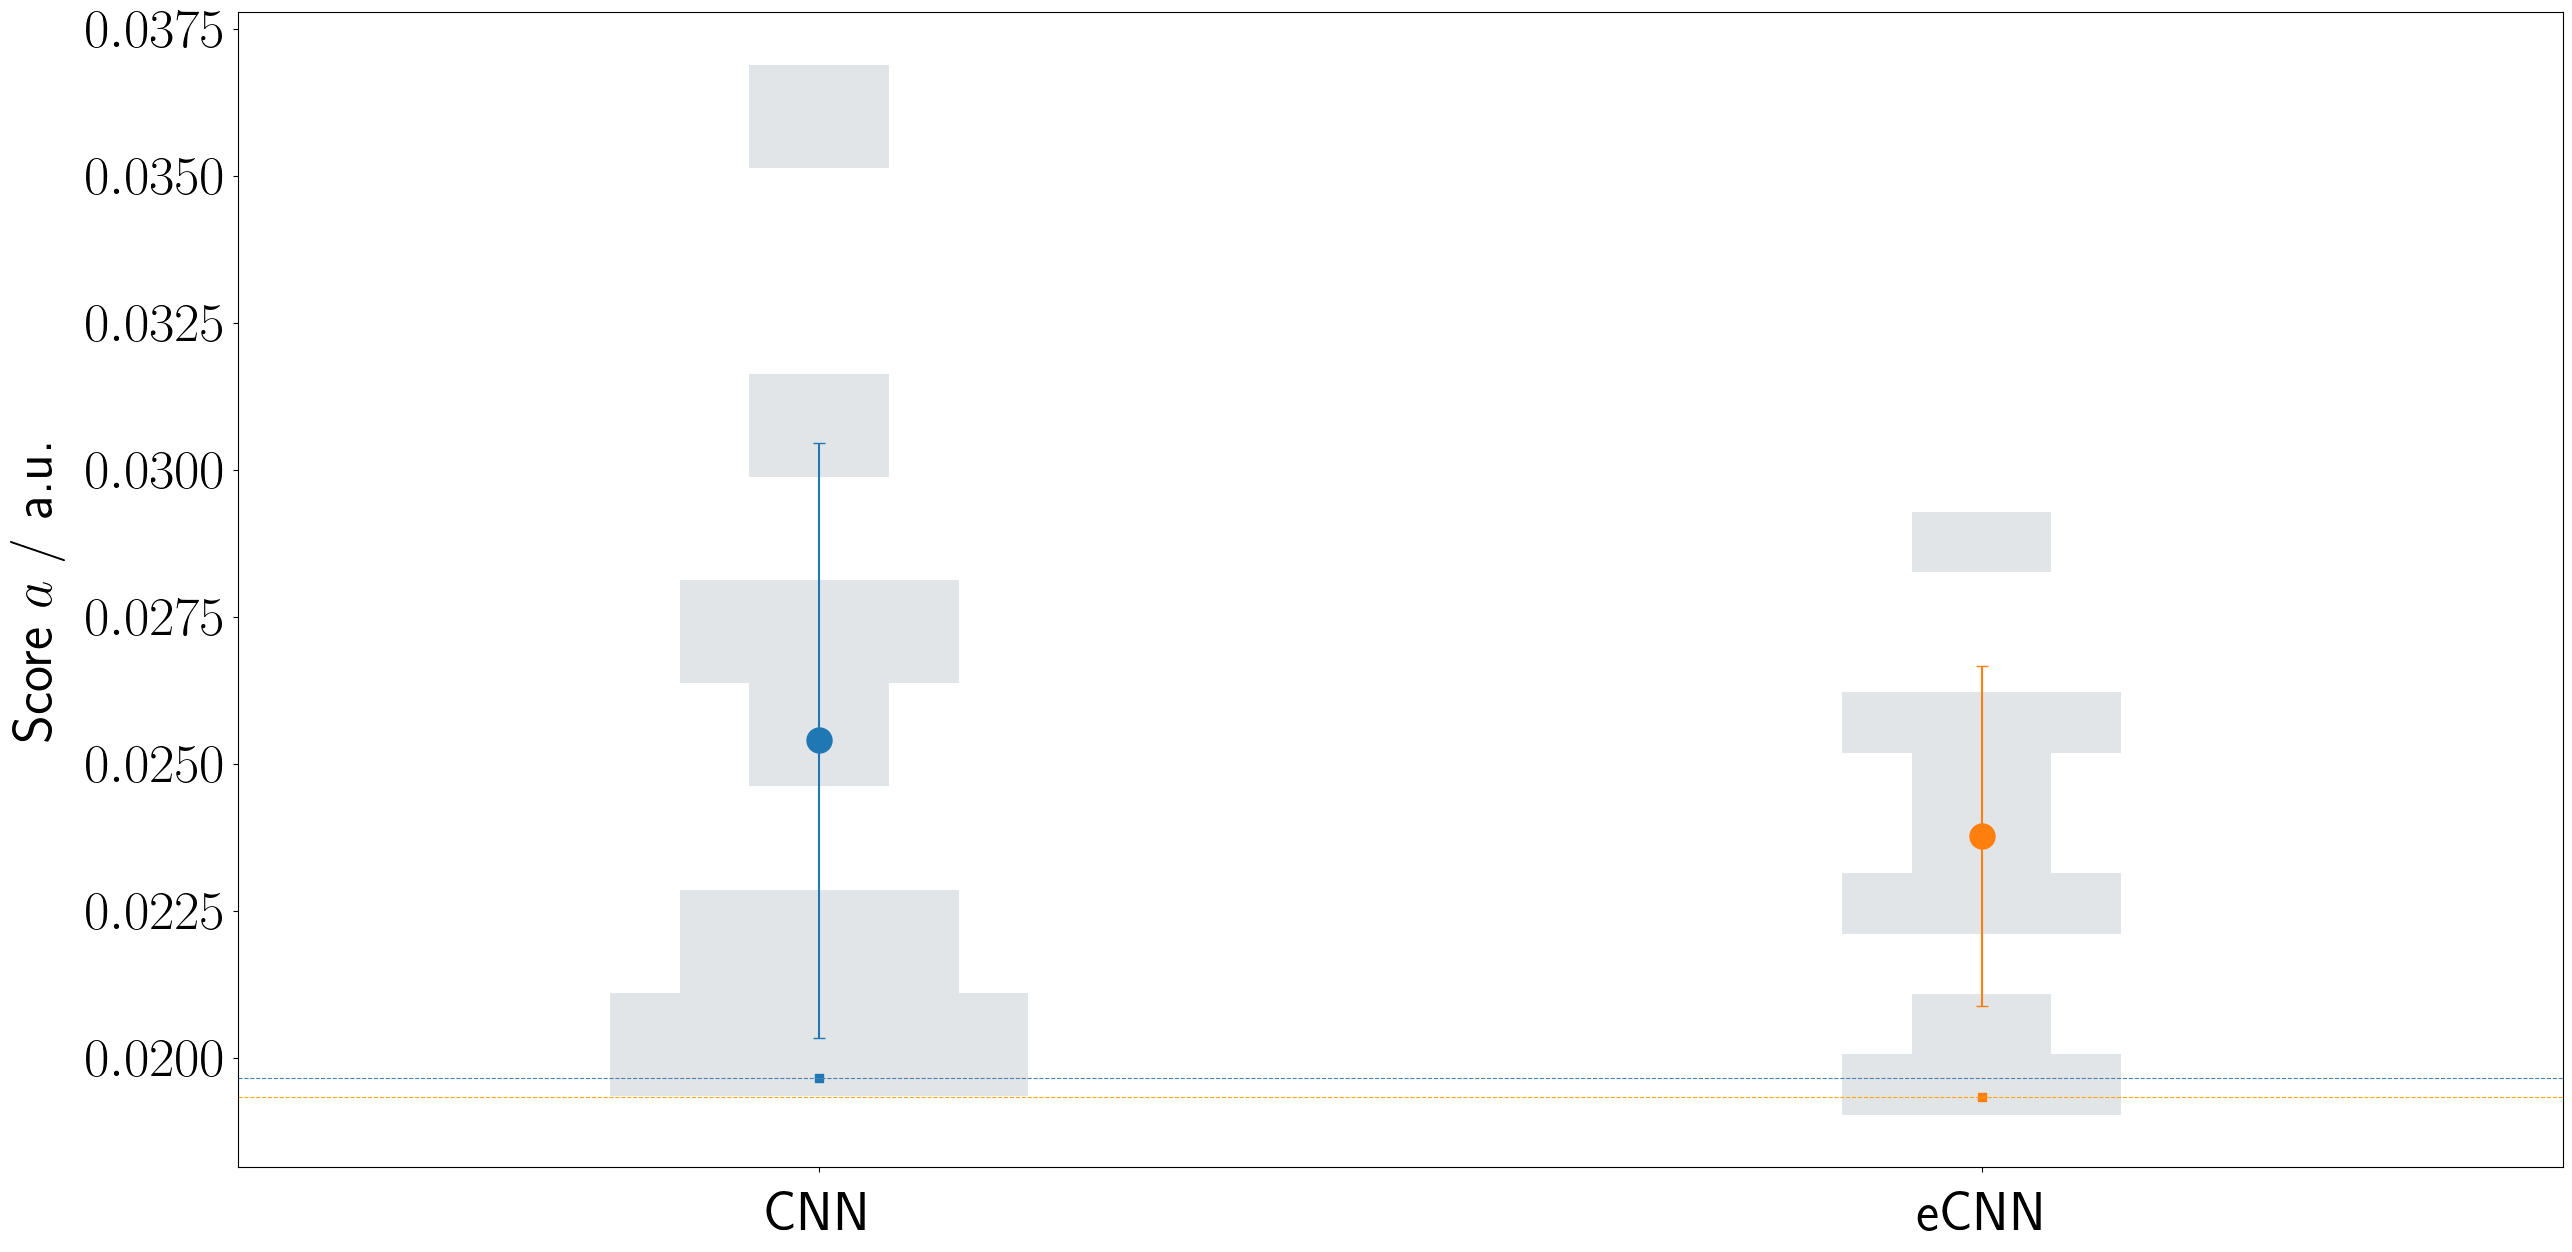

In [15]:
color = ["steelblue", "orange"]
scaling = 0.06


for i, score in enumerate([score_ecnn, score_cnn]):

    n_histo, bins = np.histogram(score, bins = 10)
    bin_width = bins[1] - bins[0]
    current_y = min(score) - 3e-4
    boxes = []

    for j, score_bin in enumerate(n_histo):
        boxes.append(Rectangle((i - scaling * score_bin, current_y), width = 2 * scaling * score_bin, height = bin_width))
        current_y += bin_width

    plt.gca().add_collection(PatchCollection(boxes, facecolor = "slategray", lw = 0, alpha = 0.2))
    plt.errorbar(i, np.mean(score), yerr = np.std(score), capsize = 4, markersize = 18, fmt = "o")
    plt.scatter(i, min(score), marker = "s")
    plt.axhline(min(score), ls = "--", lw = 0.8, color = color[i])

plt.xlim(-0.5, 1.5)
plt.xticks([0, 1], ["CNN", "eCNN"])
plt.ylabel("Score $a$ / a.u.", labelpad = 15)

# plt.scatter(np.zeros_like(score_cnn), score_cnn)
# plt.scatter(np.ones_like(score_ecnn), score_ecnn)

plt.tick_params(axis = "x", which = "major", pad = 15)